In [1]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(42)
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Wall time: 16.7 s


In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from collections import Counter 
stopwords = set(STOPWORDS)

In [3]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools

In [4]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools

In [5]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [6]:
train_data = pd.read_excel('ConstraintEnglishTrain.xlsx')
validation_data = pd.read_excel('ConstraintEnglishVal.xlsx')
test_data = pd.read_excel ('ConstraintEnglishTest.xlsx')

In [7]:
print("Size of the training data ==> ", train_data.shape)
print("Size of the validation data ==>", validation_data.shape)
print("Size of the testing data ==> ", test_data.shape)

Size of the training data ==>  (6420, 3)
Size of the validation data ==> (2140, 3)
Size of the testing data ==>  (2140, 3)


In [8]:
train_data.info()
validation_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usag

In [9]:
entire = pd.concat([train_data, validation_data, test_data])
entire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10700 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10700 non-null  int64 
 1   tweet   10700 non-null  object
 2   label   10700 non-null  object
dtypes: int64(1), object(2)
memory usage: 334.4+ KB


In [10]:
print(train_data['label'].value_counts())
print(validation_data['label'].value_counts())
print(test_data['label'].value_counts())
print(entire['label'].value_counts())

real    3360
fake    3060
Name: label, dtype: int64
real    1120
fake    1020
Name: label, dtype: int64
real    1120
fake    1020
Name: label, dtype: int64
real    5600
fake    5100
Name: label, dtype: int64


In [11]:
combined = entire['tweet']
fake = entire[entire['label']=='fake']['tweet']
real = entire[entire['label']=='real']['tweet']

In [12]:
print(sum(len(x) for x in combined) / len(combined))
print(sum(len(x) for x in fake) / len(fake))
print(sum(len(x) for x in real) / len(real))

181.89429906542057
143.21058823529413
217.12410714285716


In [13]:
print(sum(len(x.split()) for x in combined) / len(combined))
print(sum(len(x.split()) for x in fake) / len(fake))
print(sum(len(x.split()) for x in real) / len(real))

27.051214953271028
21.652941176470588
31.9675


In [14]:
def concat_all_sentences(sents):
    all_tokens = ''
    for text in sents:
        tx = str(text).lower().strip()
        tx = tx.replace('\n',' ')
        tx = tx.replace('&amp',' ')
        tx = tx.replace('#','')
        tx = tx.replace('-','')
        tx = tx.replace(';','')
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

In [15]:
all_tokens = concat_all_sentences(combined)
fake_tokens = concat_all_sentences(fake)   
real_tokens = concat_all_sentences(real)

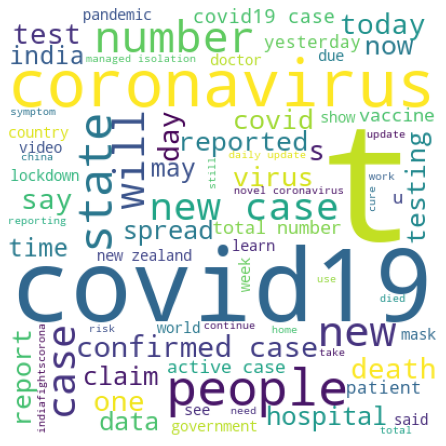

In [16]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = STOPWORDS.union({'https','co'}), 
            min_font_size = 10).generate(all_tokens)

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

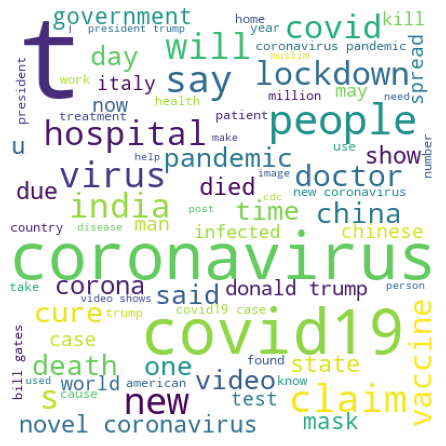

In [17]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = STOPWORDS.union({'https','co'}), 
            min_font_size = 10).generate(fake_tokens) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

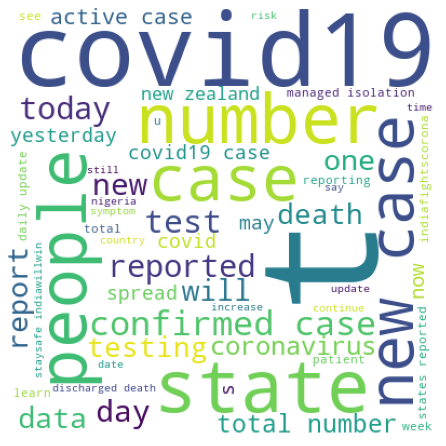

In [18]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = STOPWORDS.union({'https','co'}), 
            min_font_size = 10).generate(real_tokens) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [19]:
print(len(set(all_tokens.split())))
print(len(set(fake_tokens.split())))
print(len(set(real_tokens.split())))
print(len(set(fake_tokens.split()).intersection(set(real_tokens.split()))))

37503
19728
22916
5141


In [20]:
all_tokens_words = [w for w in all_tokens.split() if w not in STOPWORDS]
fake_tokens_words = [w for w in fake_tokens.split() if w not in STOPWORDS]
real_tokens_words = [w for w in real_tokens.split() if w not in STOPWORDS]

In [21]:
Counter(all_tokens_words).most_common(20)

[('covid19', 4236),
 ('cases', 2471),
 ('coronavirus', 2101),
 ('new', 1785),
 ('people', 1182),
 ('tests', 1025),
 ('number', 858),
 ('will', 813),
 ('deaths', 804),
 ('total', 802),
 ('confirmed', 782),
 ('reported', 774),
 ('states', 753),
 ('testing', 701),
 ('covid19.', 661),
 ('health', 631),
 ('covid', 623),
 ('now', 593),
 ('india', 537),
 ('one', 535)]

In [22]:
Counter(fake_tokens_words).most_common(20)

[('coronavirus', 1672),
 ('covid19', 1513),
 ('people', 455),
 ('will', 394),
 ('new', 343),
 ('coronavirus.', 335),
 ('trump', 333),
 ('says', 320),
 ('video', 307),
 ('covid19.', 300),
 ('vaccine', 286),
 ('virus', 270),
 ('president', 243),
 ('covid', 233),
 ('cases', 219),
 ('shows', 219),
 ('pandemic', 217),
 ('hospital', 217),
 ('india', 211),
 ('claims', 197)]

In [23]:
Counter(real_tokens_words).most_common(20)

[('covid19', 2723),
 ('cases', 2252),
 ('new', 1442),
 ('tests', 941),
 ('number', 789),
 ('total', 775),
 ('people', 727),
 ('reported', 719),
 ('confirmed', 712),
 ('states', 668),
 ('deaths', 668),
 ('testing', 613),
 ('now', 485),
 ('health', 447),
 ('rt', 437),
 ('coronavirus', 429),
 ('will', 419),
 ('report', 415),
 ('state', 395),
 ('covid', 390)]

In [24]:
## Mapping the labels real=0, fake=1
train_data['training_label']= train_data.label.replace({'real':0,'fake':1})
print(train_data.head(10))

   id                                              tweet label  training_label
0   1  The CDC currently reports 99031 deaths. In gen...  real               0
1   2  States reported 1121 deaths a small rise from ...  real               0
2   3  Politically Correct Woman (Almost) Uses Pandem...  fake               1
3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real               0
4   5  Populous states can generate large case counts...  real               0
5   6  Covid Act Now found "on average each person in...  real               0
6   7  If you tested positive for #COVID19 and have n...  real               0
7   8  Obama Calls Trump’s Coronavirus Response A Cha...  fake               1
8   9  ???Clearly, the Obama administration did not l...  fake               1
9  10  Retraction—Hydroxychloroquine or chloroquine w...  fake               1


In [25]:
validation_data['validation_label']= validation_data.label.replace({'real':0,'fake':1})
validation_data.head(10)

,id,tweet,label,validation_label
0,1,Chinese converting to Islam after realising th...,fake,1
1,2,11 out of 13 people (from the Diamond Princess...,fake,1
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake,1
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake,1
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real,0
5,6,No one can leave managed isolation for any rea...,real,0
6,7,#IndiaFightsCorona India has one of the lowest...,real,0
7,8,RT @WHO: #COVID19 transmission occurs primaril...,real,0
8,9,News and media outlet ABP Majha on the basis o...,fake,1
9,10,???Church services can???t resume until we???r...,fake,1


In [26]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
%%time
## Cleaning the data. Removing newlines, unnecessary symbols

punctuations = '''’'!()-[]{};:'"\,<>./?@#$%^&*_~�'''



def remove_punctuation_url(d):
    d=d.lower()
    d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', d, flags=re.MULTILINE) #This line is for removing url
    review = d.replace('\n', '')
    no_punct = ""
    for char in review:
      if char not in punctuations:
         no_punct = no_punct + char
    return no_punct

def remove_stopwords(d):
  text_tokens = word_tokenize(d.lower())
  tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
  ls = ""
  for w in tokens_without_sw:
    ls = ls +" "+w.lower()
  return ls

#removing URLs and Punctuations
#train_data['cleaned'] = train_data['tweet'].apply(remove_url)
#Removing punctuations
train_data['cleaned'] = train_data['tweet'].apply(remove_punctuation_url)
validation_data['cleaned'] = validation_data['tweet'].apply(remove_punctuation_url)
#Removing stop words
#train_data['cleaned'] = train_data['cleaned'].apply(remove_stopwords)

## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(10):
  print(train_data.cleaned[i])

Data samples after cleaning:

the cdc currently reports 99031 deaths in general the discrepancies in death counts between different sources are small and explicable the death toll stands at roughly 100000 people today
states reported 1121 deaths a small rise from last tuesday southern states reported 640 of those deaths 
politically correct woman almost uses pandemic as excuse not to reuse plastic bag  coronavirus nashville
indiafightscorona we have 1524 covid testing laboratories in india and as on 25th august 2020 36827520 tests have been done  profbhargava dg icmrdelhi staysafe indiawillwin 
populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than california or texas al ar id ks ky la ms nv and sc 
covid act now found on average each person in illinois with covid19 is infecting 111 other people data shows that the infection growth rate has declined over time this factors in the stayatho

In [28]:
train_data.head(10)
# Now we have raw text, label and cleaned data

,id,tweet,label,training_label,cleaned
0,1,The CDC currently reports 99031 deaths. In gen...,real,0,the cdc currently reports 99031 deaths in gene...
1,2,States reported 1121 deaths a small rise from ...,real,0,states reported 1121 deaths a small rise from ...
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,1,politically correct woman almost uses pandemic...
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,0,indiafightscorona we have 1524 covid testing l...
4,5,Populous states can generate large case counts...,real,0,populous states can generate large case counts...
5,6,"Covid Act Now found ""on average each person in...",real,0,covid act now found on average each person in ...
6,7,If you tested positive for #COVID19 and have n...,real,0,if you tested positive for covid19 and have no...
7,8,Obama Calls Trump’s Coronavirus Response A Cha...,fake,1,obama calls trumps coronavirus response a chao...
8,9,"???Clearly, the Obama administration did not l...",fake,1,clearly the obama administration did not leave...
9,10,Retraction—Hydroxychloroquine or chloroquine w...,fake,1,retraction—hydroxychloroquine or chloroquine w...


In [29]:
def data_statistics(class_names):
  words_per_class = []
  unique_words_per_class = []
  documents_per_class = []

  for label in class_names:
    ## Word list from the clean dataset
    word_list = [word.strip().lower() for t in list(train_data[train_data.label==label].cleaned) for word in t.strip().split()]
    counts = dict()
    for w in word_list:
      counts[w] = counts.get(w, 0)+1
    # Sort the word list on descending order in terms of frequency
    ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    # Total words per class
    words_per_class.append(len(word_list))
    # Unique words per class
    unique_words_per_class.append(len(np.unique(word_list)))
    # Number of documents per class
    documents_per_class.append(len(list(train_data[train_data.label==label].cleaned)))

    print("Class name: {}".format(label))
    print("Number of words: {}".format(len(word_list)))
    print("Number of unique words: {}".format(len(np.unique(word_list)))) 
    print("Number of Documents: {}".format(len(list(train_data[train_data.label==label].cleaned))))  
    print("10 most frequent words:\n")
    for i, f in ordered[:10]:
      print("{}\t{}".format(i, f))
    
  return words_per_class, unique_words_per_class, documents_per_class

class_names = ['real','fake']

words, unique_words, documents = data_statistics(class_names)

Class name: real
Number of words: 103123
Number of unique words: 10771
Number of Documents: 3360
10 most frequent words:

the	4053
of	3071
to	2485
in	2440
covid19	2079
and	1689
cases	1564
a	1420
is	1267
are	1138
Class name: fake
Number of words: 65076
Number of unique words: 10305
Number of Documents: 3060
10 most frequent words:

the	2900
a	1664
to	1630
of	1538
in	1436
coronavirus	1294
covid19	1169
and	1038
is	781
for	716


In [30]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':unique_words,
                            'Class Names':class_names})
data_matrix

,Total Documents,Total Words,Unique Words,Class Names
0,3360,103123,10771,real
1,3060,65076,10305,fake


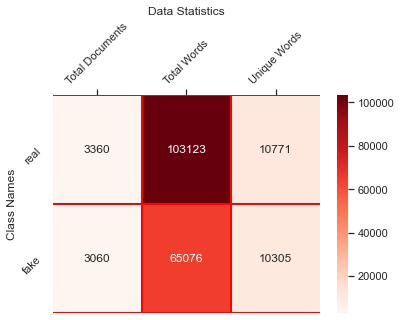

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize =(6, 4))
ax = plt.subplot()
sns.heatmap(data_matrix.iloc[:,0:3], annot=True,fmt="d", linewidths=0.5,linecolor = 'Red',cmap = 'Reds',ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_ylabel('Class Names') 
ax.set_title('Data Statistics')
y_label = ["Total Documents", "Total Words", "Unique Words"] 
ax.xaxis.set_ticklabels(y_label, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
ax.xaxis.tick_top()

In [32]:
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
print(df)

  Class Names         Category  Values
0        real  Total Documents    3360
1        fake  Total Documents    3060
2        real      Total Words  103123
3        fake      Total Words   65076
4        real     Unique Words   10771
5        fake     Unique Words   10305


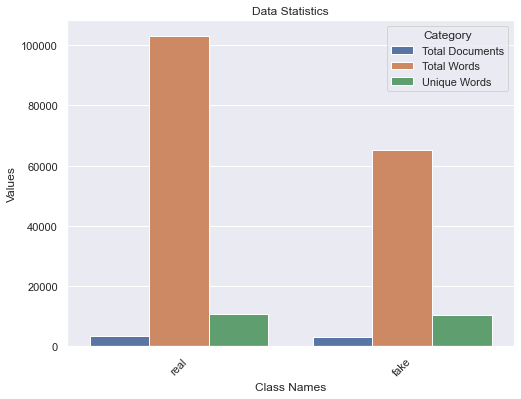

In [33]:
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

In [34]:
frequency = dict()
for x in train_data['cleaned']:
  i = len(x.split())
  frequency[i] = frequency.get(i, 0)+1
frequency = sorted(frequency.items(), key= lambda item: item[0])
print(frequency)
print(type(frequency))

[(2, 1), (3, 8), (4, 10), (5, 29), (6, 62), (7, 107), (8, 115), (9, 147), (10, 171), (11, 210), (12, 224), (13, 208), (14, 233), (15, 230), (16, 192), (17, 175), (18, 176), (19, 151), (20, 167), (21, 173), (22, 153), (23, 130), (24, 160), (25, 133), (26, 118), (27, 146), (28, 129), (29, 150), (30, 152), (31, 138), (32, 137), (33, 148), (34, 133), (35, 151), (36, 123), (37, 151), (38, 155), (39, 139), (40, 124), (41, 147), (42, 115), (43, 105), (44, 105), (45, 89), (46, 86), (47, 58), (48, 56), (49, 43), (50, 37), (51, 29), (52, 12), (53, 14), (54, 10), (55, 5), (56, 4), (57, 7), (58, 4), (59, 4), (60, 2), (61, 2), (63, 1), (64, 2), (65, 2), (66, 1), (67, 2), (70, 1), (71, 1), (72, 1), (73, 1), (77, 1), (78, 1), (79, 1), (81, 1), (85, 1), (86, 1), (87, 1), (93, 2), (96, 1), (98, 1), (118, 1), (325, 1), (822, 1), (1409, 1)]
<class 'list'>


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 70, 71, 72, 73, 77, 78, 79, 81, 85, 86, 87, 93, 96, 98, 118, 325, 822, 1409] [1, 8, 10, 29, 62, 107, 115, 147, 171, 210, 224, 208, 233, 230, 192, 175, 176, 151, 167, 173, 153, 130, 160, 133, 118, 146, 129, 150, 152, 138, 137, 148, 133, 151, 123, 151, 155, 139, 124, 147, 115, 105, 105, 89, 86, 58, 56, 43, 37, 29, 12, 14, 10, 5, 4, 7, 4, 4, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]


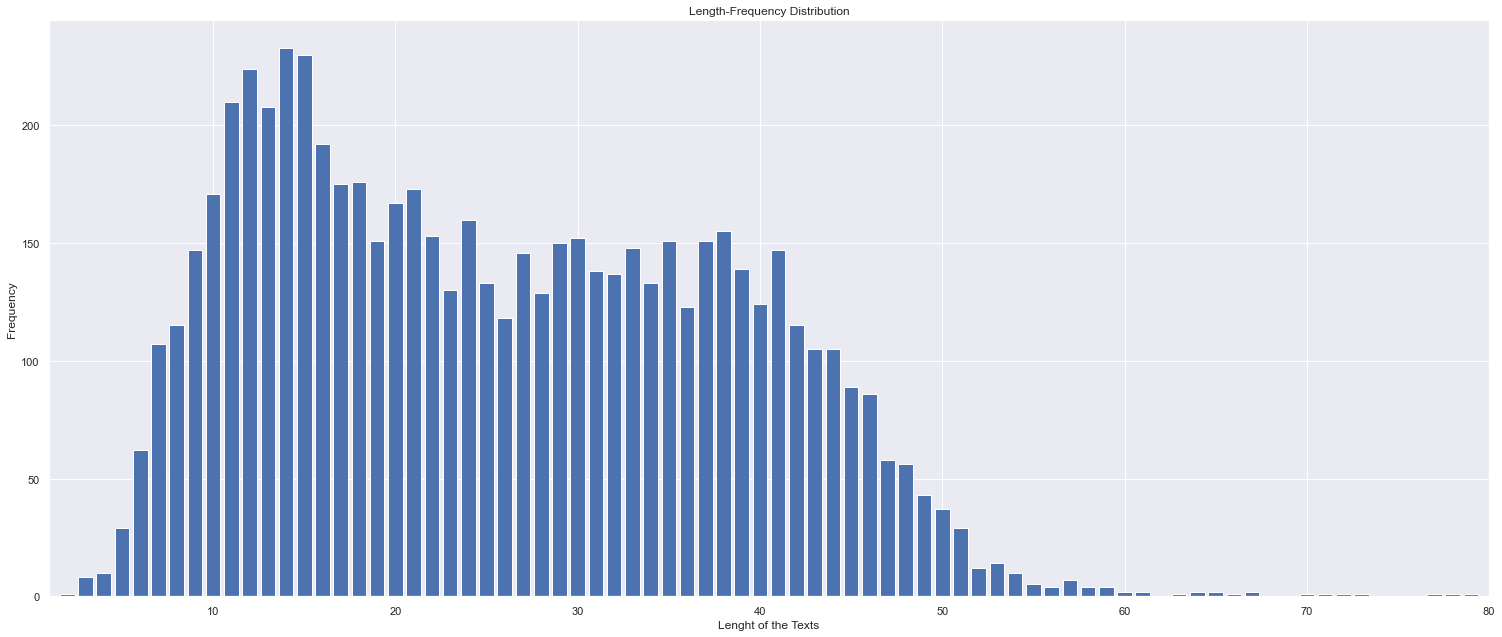

In [35]:
xx = [x for x, k in frequency]
yy = [k for x, k in frequency]
print(xx, yy)
fig = plt.figure(figsize=(20, 8))
ax = fig.add_axes([0,0,1,1])

ax.bar(xx,yy, color='b')
plt.xlim(1, 80)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer

def text_encoding(texts, labels, max_words, padding_length):
  tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token=None, document_count=0)
  
  # Tokenizer is fitted into the texts
  tokenizer.fit_on_texts(texts)

  # Printing tokenizer information
  (word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
  
  def tokenizer_info(mylist):
    ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = True)
    for w,c in ordered[:10]:
      print(w,"\t",c)
  
  print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)   
  print("Words --> Counts:")
  tokenizer_info(word_counts)
  print("\nWords --> Documents:")
  tokenizer_info(word_docs)
  print("\nWords --> Index:")
  tokenizer_info(word_index)    
  print("\nTotal Documents -->",document_count)

  # Encoding texts into integer sequences
  sequences = tokenizer.texts_to_sequences(texts)
  word_index = tokenizer.word_index
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\nFound {} unique tokens".format(len(word_index)))  
  print(texts[10],"\n",sequences[10])

  # Pad sequences
  corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
  print("\n\t\t\t====== Paded Sequences ======\n",texts[10],"\n",corpus[10])

  return corpus, labels, tokenizer

##
max_words = 20000# Based on number of unique words in the dataset
padding_length = 100

corpus, labels, tokenizer = text_encoding(train_data.cleaned, train_data.training_label, max_words, padding_length)

			====== Tokenizer Info ======
Words --> Counts:
the 	 6953
of 	 4609
to 	 4115
in 	 3876
covid19 	 3248
a 	 3084
and 	 2727
is 	 2048
for 	 1831
cases 	 1721

Words --> Documents:
the 	 3733
of 	 3061
to 	 2859
in 	 2695
covid19 	 2684
a 	 2193
and 	 2068
is 	 1612
for 	 1537
coronavirus 	 1496

Words --> Index:
infertility 	 17523
dargah 	 17522
intubate 	 17521
repandybiggsaz 	 17520
rickleventhal 	 17519
ashley 	 17518
charliekirk11 	 17517
daveman19802 	 17516
kagashley 	 17515
reserved 	 17514

Total Documents --> 6420

			====== Encoded Sequences ====== 
Found 17523 unique tokens
take simple daily precautions to help prevent the spread of respiratory illnesses like covid19 learn how to protect yourself from coronavirus covid19   
 [163, 1269, 92, 1461, 3, 141, 237, 1, 98, 2, 695, 1082, 177, 5, 173, 152, 3, 217, 360, 15, 11, 5]

			====== Paded Sequences ======
 take simple daily precautions to help prevent the spread of respiratory illnesses like covid19 learn how to protect yo

In [37]:
training_data, training_labels = corpus, labels

In [38]:
print(training_data, training_labels)

[[   1  140  271 ...    0    0    0]
 [  35   41 7571 ...    0    0    0]
 [5152 1842  437 ...    0    0    0]
 ...
 [   6  326  161 ...    0    0    0]
 [2930 1014 2802 ...    0    0    0]
 [  33   19   32 ...    0    0    0]] 0       0
1       0
2       1
3       0
4       0
       ..
6415    1
6416    1
6417    1
6418    1
6419    0
Name: training_label, Length: 6420, dtype: int64


In [39]:
## Defining Callbacks
def define_callback():
  keras.backend.clear_session()
  accuracy_threshold = .999

  class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>accuracy_threshold):
          print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
          self.model.stop_training = True

  acc_callback = myCallback()

  return acc_callback

# Define TensorBoard
def define_TensorBoard():
  %load_ext tensorboard
  import datetime, os
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  return tensorboard_callback

# Define Checkpoint
def define_checkpoint():
  filepath = "ModelOnOurData.h5"
  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, save_weights_only=False, mode='max')
  return checkpoint

In [40]:
# Create Model
def create_model(embedding_dim):
  keras.backend.clear_session()
  no_of_class = len(class_names)

  model = keras.models.Sequential([
      keras.layers.Embedding(max_words, embedding_dim, input_length = padding_length),
      #keras.layers.Conv1D(64, 5, activation='relu'),
      #keras.layers.MaxPooling1D(5),
      #keras.layers.Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)),
      keras.layers.Bidirectional(LSTM(32, dropout=0.2)),
      keras.layers.Flatten(),
      keras.layers.Dense(no_of_class, activation = 'softmax')
  ])

  model.summary()
  return model

# Visualize Model
def model_visualize(model):
  from tensorflow.keras.utils import plot_model
  plot_model(model, to_file = 'print.png', show_shapes = True, show_layer_names = True)

# Compile Model
def compile_model(model):
  model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy')
  return model

In [41]:
%%time
## Callbacks are really important 

def run_callback_list():
  acc_callback = define_callback()
  checkpoint = define_checkpoint()
  tensorboard_callback = define_TensorBoard()
  return [acc_callback, checkpoint, tensorboard_callback] 

callback_list = run_callback_list()

def run_model():
    embedding_dim = 100
    model = create_model(embedding_dim)
    model = compile_model(model)
    model_visualize(model)
    return model

## Create, Compile and Visualize the model
cnn_lstm_model = run_model() ##

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          2000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                34048     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
Total params: 2,034,178
Trainable params: 2,034,178
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Wall time: 1.87 s


In [42]:
cnn_lstm_model_history = cnn_lstm_model.fit(training_data,
                              training_labels,
                              epochs = 100,
                              batch_size = 128,
                              verbose = 1,
                              validation_split = 0.15,
                              callbacks = callback_list)

Epoch 1/100
43/43 [==============================] - 20s 307ms/step - loss: 0.6465 - accuracy: 0.5949 - val_loss: 0.3407 - val_accuracy: 0.8671

Epoch 00001: val_accuracy improved from -inf to 0.86708, saving model to ModelOnOurData.h5
Epoch 2/100
43/43 [==============================] - 8s 179ms/step - loss: 0.2793 - accuracy: 0.8920 - val_loss: 0.2316 - val_accuracy: 0.9076

Epoch 00002: val_accuracy improved from 0.86708 to 0.90758, saving model to ModelOnOurData.h5
Epoch 3/100
43/43 [==============================] - 8s 189ms/step - loss: 0.1178 - accuracy: 0.9644 - val_loss: 0.2100 - val_accuracy: 0.9232

Epoch 00003: val_accuracy improved from 0.90758 to 0.92316, saving model to ModelOnOurData.h5
Epoch 4/100
43/43 [==============================] - 7s 175ms/step - loss: 0.0485 - accuracy: 0.9873 - val_loss: 0.2056 - val_accuracy: 0.9273

Epoch 00004: val_accuracy improved from 0.92316 to 0.92731, saving model to ModelOnOurData.h5
Epoch 5/100
43/43 [==============================]

In [43]:
validation_data = pd.read_excel('ConstraintEnglishVal.xlsx')
print("\n\nSize of the validation data ==> ", len(validation_data))
print(validation_data.head(5))

print(type(validation_data))
print(validation_data.head(10))

validation_data['validation_label']= validation_data.label.replace({'real':0,'fake':1}) 

## Cleaning the data. Removing newlines, unnecessary symbols
#validation_data['cleaned'] = validation_data['tweet'].apply(remove_url)
validation_data['cleaned'] = validation_data['tweet'].apply(remove_punctuation_url)
#data['cleaned'] = data['cleaned'].apply(remove_stopwords)
print(validation_data.head(10))



Size of the validation data ==>  2140
   id                                              tweet label
0   1  Chinese converting to Islam after realising th...  fake
1   2  11 out of 13 people (from the Diamond Princess...  fake
2   3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
3   4  Mike Pence in RNC speech praises Donald Trump’...  fake
4   5  6/10 Sky's @EdConwaySky explains the latest #C...  real
<class 'pandas.core.frame.DataFrame'>
   id                                              tweet label
0   1  Chinese converting to Islam after realising th...  fake
1   2  11 out of 13 people (from the Diamond Princess...  fake
2   3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
3   4  Mike Pence in RNC speech praises Donald Trump’...  fake
4   5  6/10 Sky's @EdConwaySky explains the latest #C...  real
5   6  No one can leave managed isolation for any rea...  real
6   7  #IndiaFightsCorona India has one of the lowest...  real
7   8  RT @WHO: #COVID19 transmission oc

In [44]:
## Converting into interger index based on tokenizer word index. It is important for predicting
val_sequences = tokenizer.texts_to_sequences(validation_data.cleaned)
print(val_sequences[0:10])
val_data = keras.preprocessing.sequence.pad_sequences(val_sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
val_labels = validation_data['validation_label']

print(val_data[:5], val_data.shape)
print(val_labels[:5], val_labels.shape)

[[311, 11378, 3, 4650, 93, 13, 56, 921, 46, 555, 28, 11, 10993, 4, 1, 139], [501, 102, 2, 661, 24, 15, 1, 5493, 4274, 1749, 1409, 38, 119, 83, 302, 4, 26, 4, 1346, 58, 1189, 39, 3, 27, 84, 4, 1, 411, 35], [5, 8, 453, 28, 6, 2638, 30, 69, 7, 43, 27, 916, 18, 5446], [2309, 2331, 4, 8910, 4368, 13122, 254, 755, 5, 6520, 2258, 18, 973, 7, 2568, 102, 1, 2214, 57, 3856], [3838, 1122, 1, 165, 5, 79, 7, 131, 2752, 128, 25, 14, 1, 11, 79], [56, 63, 43, 1579, 194, 123, 9, 185, 1015, 427, 912, 6, 302, 87, 62, 61, 2031, 6, 87, 61, 43, 424, 27, 1867, 9, 6, 706, 2, 68, 3, 582, 86, 200, 200, 14, 370, 1, 4053, 5377, 14, 2577, 4632, 17, 32, 6227, 200, 200], [64, 52, 19, 63, 2, 1, 524, 5, 645, 1544, 18, 353, 47, 88, 72, 520, 101, 20, 6, 559, 2, 6669, 136, 123, 45, 405, 443, 262, 179, 516, 17, 1764, 499, 47, 1, 215, 191], [81, 38, 5, 372, 12572, 4779, 261, 2528, 53, 322, 224, 18, 174, 24, 261, 77, 6914, 7], [120, 7, 343, 6705, 14, 1, 1249, 2, 54, 9847, 2, 333, 1087, 3044, 41, 13, 6, 1646, 2162, 19, 32, 3

In [45]:
val_ls, val_acc = cnn_lstm_model.evaluate(val_data, val_labels)
print(val_ls, val_acc)

## To find class wise probability
predicted_probability = cnn_lstm_model.predict(val_data)
print(predicted_probability)

# Find the predicted class for every input text
predicted_classess = np.argmax(cnn_lstm_model.predict(val_data), axis=-1)
print(predicted_classess)

67/67 [==============================] - 1s 9ms/step - loss: 0.3301 - accuracy: 0.9000
0.3301035463809967 0.8999999761581421
[[4.70827363e-04 9.99529243e-01]
 [9.98645842e-01 1.35420938e-03]
 [1.36163458e-03 9.98638332e-01]
 ...
 [1.07883778e-03 9.98921156e-01]
 [8.86041641e-01 1.13958396e-01]
 [9.99270618e-01 7.29362539e-04]]
[1 0 1 ... 1 0 0]


In [46]:
predictions = np.argmax(cnn_lstm_model.predict(val_data), axis = -1)
cm = confusion_matrix(val_labels, predictions)
acc = round(accuracy_score(val_labels, predictions),4)*100 
prec = round(precision_score(val_labels, predictions, average='weighted'),4)*100
re = round(recall_score(val_labels, predictions, average='weighted'),4)*100
f1 = round(f1_score(val_labels, predictions, average= 'weighted'),4)*100
print(color.BOLD+'Confusion Matrix:\n'+color.END,cm)
print (color.BOLD+'Report : '+color.END)
print (classification_report(val_labels, predictions) )
print(color.BOLD+'Performance:\n'+color.END)
pd.DataFrame({'Accuracy':acc,'Precision':prec,'Recall':re,'F1 Score':f1},index = ['CNN+BiLSTM'])

Confusion Matrix:
 [[1055   65]
 [ 149  871]]
Report : 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1120
           1       0.93      0.85      0.89      1020

    accuracy                           0.90      2140
   macro avg       0.90      0.90      0.90      2140
weighted avg       0.90      0.90      0.90      2140

Performance:



,Accuracy,Precision,Recall,F1 Score
CNN+BiLSTM,90.0,90.21,90.0,89.97


In [47]:
# Find out some misclassified text. Check which class overlaps with other classes
for i in range(50):
  actual = val_labels[i]
  prediction = predicted_classess[i]
  if(actual!=prediction):
      print("Actual Data: {}\nPredicted Label: {}\nActual Label: {}\n".format(validation_data['tweet'][i], class_names[prediction], class_names[actual]))

Actual Data: 11 out of 13 people (from the Diamond Princess Cruise ship) who had intially tested negative in tests in Japan were later confirmed to be positive in the United States.
Predicted Label: real
Actual Label: fake

Actual Data: You can still fly the friendly skies without fear of COVID if airlines stay serious about safety. https://t.co/H8mGjwDl7G #coronavirus
Predicted Label: fake
Actual Label: real

Actual Data: India records yet another single-day rise of over 28000 new cases while more than 5.5 lakh individuals have recovered from COVID-19. Kerala government sets up its first plasma bank in the state following in the steps of Delhi and West Bengal. #COVID19 #CoronavirusFacts https://t.co/JhSQUqMvta
Predicted Label: real
Actual Label: fake

Actual Data: Tomorrow April 6 we will pass 10000 coronavirus deaths. We passed 5000 on April 2. We passed 1000 on March 26. We passed 100 on March 18.
Predicted Label: fake
Actual Label: real

Actual Data: Gov. Andrew Cuomo “was simply s

[[1055   65]
 [ 149  871]]


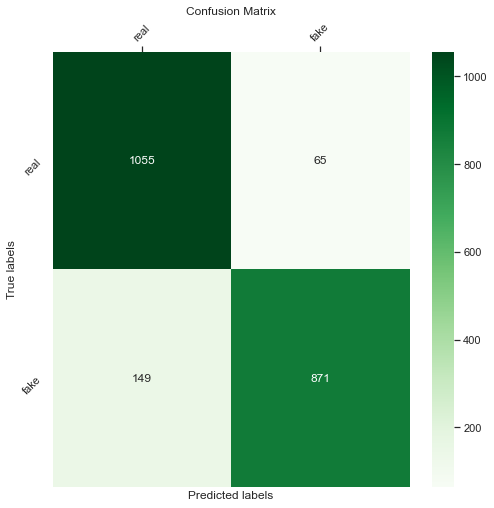

In [48]:
def con_mat(model):
  test_prediction = np.argmax(model.predict(val_data), axis = -1)
  cm = confusion_matrix(val_labels, test_prediction)
  print(cm)

  import seaborn as sns
  #sns.set()
  plt.figure(figsize =(8, 8))
  ax = plt.subplot()
  sns.heatmap(cm, annot=True,fmt="d",cmap='Greens', ax = ax) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels') 
  ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(class_names, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
  ax.xaxis.tick_top()

con_mat(cnn_lstm_model)

In [49]:
tf_idf = TfidfVectorizer(ngram_range=(1,3), min_df=5, tokenizer=lambda x: x.split(), max_features=20000, use_idf = True)
corpus = tf_idf.fit_transform(train_data.cleaned)
labels = train_data.training_label
print(corpus.shape)

(6420, 9448)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(corpus,labels,train_size = 0.9, test_size = 0.1,random_state =0)
print(X_train.shape, X_test.shape)

(5778, 9448) (642, 9448)


In [51]:
%%time 
#  Define models  
                  
lr_model = LogisticRegression(random_state = 123,C =0.08)
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
rf_model = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
mnb_model = MultinomialNB(alpha=0.05)
model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes']
ml_models = [lr_model,dt_model,rf_model,mnb_model]

#Model Fit Function 

def model_train(model, X_train, y_train):
    model.fit(X_train,y_train)
    return model

trained_ml_models = []
for i in ml_models:
    tt = model_train(i,X_train, y_train)
    trained_ml_models.append(tt)

Wall time: 1.9 s


In [52]:
# Model Evaluation Function 

acc_list = []
pr_list = []
re_list = []
f1_list = []

def model_accuracy(model,X_test,y_test, model_name):
  print("Classifier: ", model_name)
  pred_y = model.predict(X_test)
  print(color.BOLD+'Confusion Matrix:\n'+color.END,confusion_matrix(y_test, pred_y))
  print (color.BOLD+'Report : '+color.END)
  print (classification_report(y_test, pred_y))
  acc_list.append((round(accuracy_score(y_test, pred_y),4)*100))
  pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100)) 
  re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
  f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    model_accuracy(md, X_test, y_test, name)

Classifier:  Logistic Regression
Confusion Matrix:
 [[288  41]
 [ 49 264]]
Report : 
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       329
           1       0.87      0.84      0.85       313

    accuracy                           0.86       642
   macro avg       0.86      0.86      0.86       642
weighted avg       0.86      0.86      0.86       642

Classifier:  Decision Tree
Confusion Matrix:
 [[267  62]
 [ 53 260]]
Report : 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       329
           1       0.81      0.83      0.82       313

    accuracy                           0.82       642
   macro avg       0.82      0.82      0.82       642
weighted avg       0.82      0.82      0.82       642

Classifier:  Random Forest
Confusion Matrix:
 [[275  54]
 [ 44 269]]
Report : 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     

In [53]:
performance_matrix = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =model_names)
performance_matrix

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,85.98,85.99,85.98,85.97
Decision Tree,82.09,82.12,82.09,82.09
Random Forest,84.74,84.78,84.74,84.74
Naive Bayes,88.63,88.85,88.63,88.62


In [54]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [55]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

SVM
val:
[[ 936   84]
 [  48 1072]]
              precision    recall  f1-score   support

        fake       0.95      0.92      0.93      1020
        real       0.93      0.96      0.94      1120

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9383177570093458
Precison :  0.9389821723081755
Recall :  0.9383177570093458
F1 :  0.9383839682296299


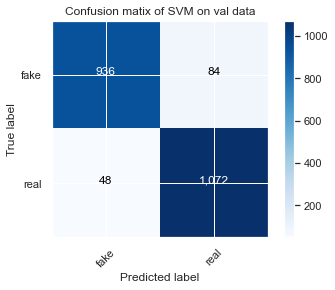

In [56]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline.fit(train_data['tweet'],train_data['label'])
print('SVM')
print ('val:')
pred=pipeline.predict(validation_data['tweet'])
print_metrices(pred,validation_data['label'])
plot_confusion_matrix(confusion_matrix(validation_data['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on val data')

val_ori = pd.read_excel('ConstraintEnglishVal.xlsx')
svm_val_misclass_df = val_ori[pred!=validation_data['label']]

Gradient Boost
val:
[[ 889  131]
 [  93 1027]]
              precision    recall  f1-score   support

        fake       0.91      0.87      0.89      1020
        real       0.89      0.92      0.90      1120

    accuracy                           0.90      2140
   macro avg       0.90      0.89      0.89      2140
weighted avg       0.90      0.90      0.90      2140

Accuracy :  0.8953271028037383
Precison :  0.8961331939317784
Recall :  0.8953271028037383
F1 :  0.8954474619601431


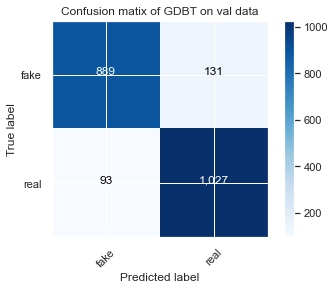

In [57]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
fit = pipeline.fit(train_data['tweet'],train_data['label'])
print('Gradient Boost')
print ('val:')
pred=pipeline.predict(validation_data['tweet'])

print_metrices(pred,validation_data['label'])
plot_confusion_matrix(confusion_matrix(validation_data['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of GDBT on val data')